# Data visualization, cleaning and feature engineering.

In [1]:
# Importing libraries for EDA.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Porter_NN.csv')
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0


In [3]:
df.shape

(175777, 14)

We have 14 features.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     175777 non-null  float64
 1   created_at                                    175777 non-null  object 
 2   actual_delivery_time                          175777 non-null  object 
 3   store_primary_category                        175777 non-null  int64  
 4   order_protocol                                175777 non-null  float64
 5   total_items                                   175777 non-null  int64  
 6   subtotal                                      175777 non-null  int64  
 7   num_distinct_items                            175777 non-null  int64  
 8   min_item_price                                175777 non-null  int64  
 9   max_item_price                                17

We have all non null values and two non-numeric values

In [5]:
# Converting object datatype to datetime.
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

# Making the target column.
df['delivery_time_minutes'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

In [6]:
# Our target feature.
df['delivery_time_minutes']

,delivery_time_minutes
0,47.0
1,44.0
2,55.0
3,59.0
4,46.0
...,...
175772,43.0
175773,62.0
175774,46.0
175775,45.0


In [7]:
# Extracting more from our datetime columns to create useful features.
df['order_day'] = df['created_at'].dt.dayofweek
df['order_hour'] = df['created_at'].dt.hour
df['order_date'] = df['created_at'].dt.day

df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,delivery_time_minutes,order_day,order_hour,order_date
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,47.0,4,22,6
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,44.0,1,21,10
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,55.0,0,0,16
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,59.0,3,3,12
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,46.0,1,2,27


In [8]:
counts_oday = df['order_day'].value_counts().reset_index()
counts_oday.columns

Index(['order_day', 'count'], dtype='object')

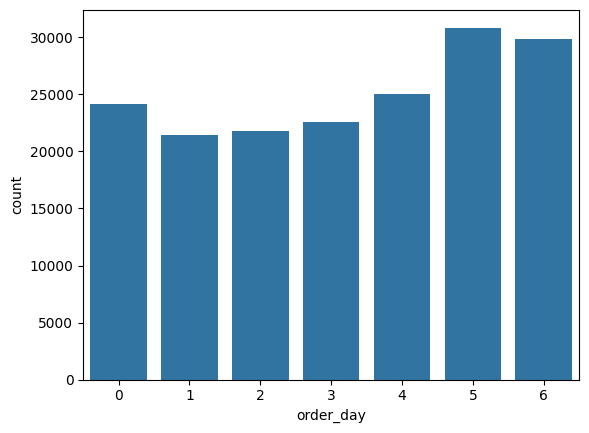

In [9]:
sns.barplot(data=counts_oday, x='order_day', y='count')
plt.show()

Above plot shows the higher counts of order on weekends.

In [10]:
counts_ohour = df['order_hour'].value_counts().reset_index()
counts_ohour.columns

Index(['order_hour', 'count'], dtype='object')

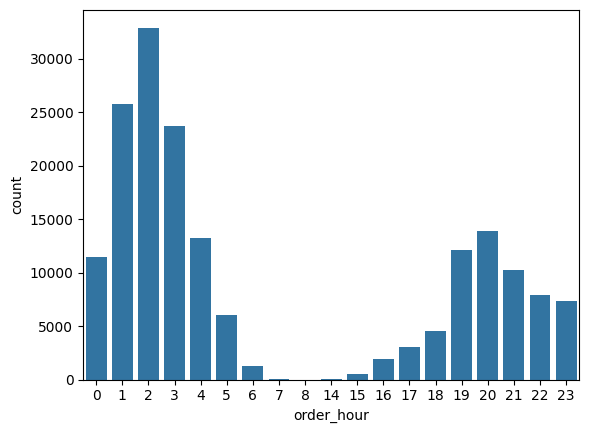

In [11]:
sns.barplot(data=counts_ohour, x='order_hour', y='count')
plt.show()

There are very high number of orders in the early morning(mid-night) time between 1AM-4AM.

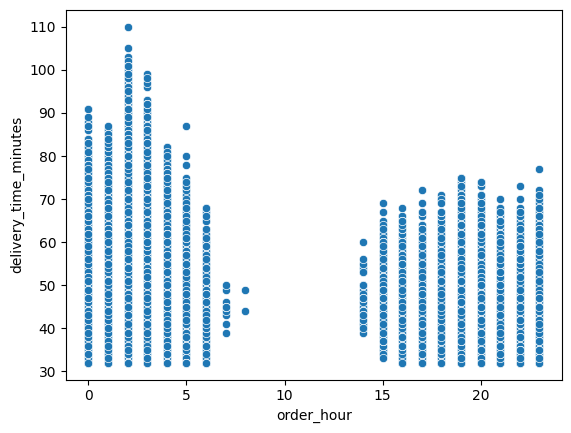

In [12]:
sns.scatterplot(x='order_hour', y='delivery_time_minutes', data=df)
plt.show()

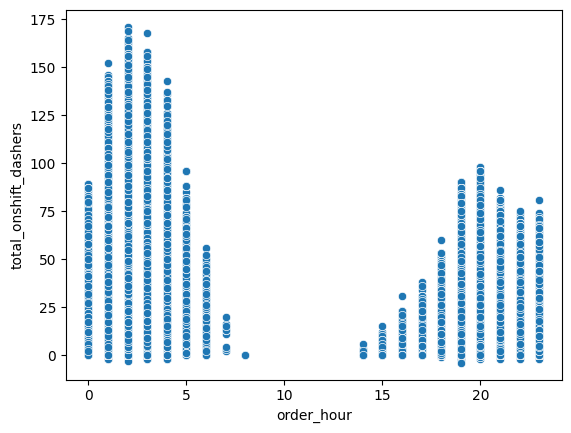

In [13]:
sns.scatterplot(x='order_hour', y='total_onshift_dashers', data=df)
plt.show()

Total_onshift_dashers are nicely alligned with the number of orders on the basis of time of the day.

In [14]:
counts_odate = df['order_date'].value_counts().reset_index()
counts_odate.columns

Index(['order_date', 'count'], dtype='object')

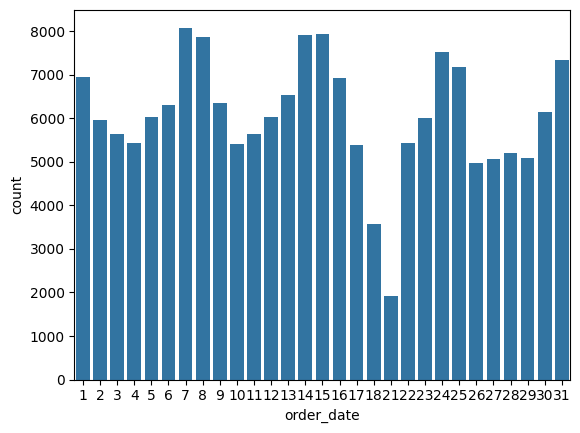

In [15]:
sns.barplot(data=counts_odate, x='order_date', y='count')
plt.show()

Monthly countplot does not show any noticable insight.

<Axes: xlabel='delivery_time_minutes', ylabel='Count'>

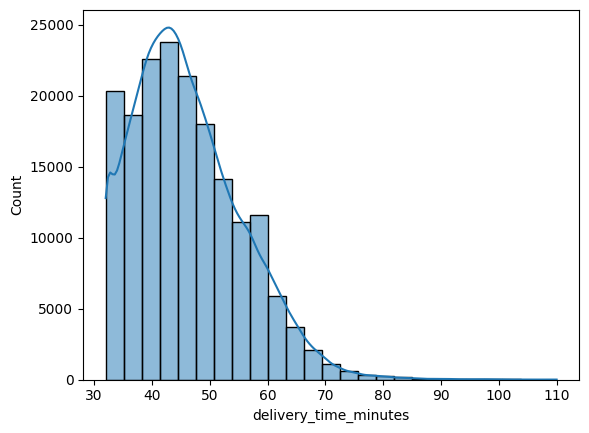

In [16]:
sns.histplot(df['delivery_time_minutes'], bins=25, kde=True)

Our target feature is right-skewed.

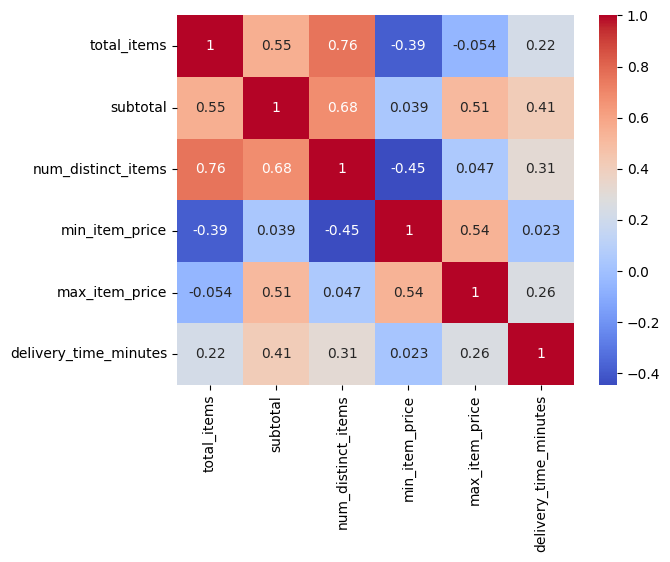

In [17]:
item_features = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'delivery_time_minutes']
sns.heatmap(df[item_features].corr(), annot=True, cmap='coolwarm')
plt.show()

We can see in this correlation, more the number of items and subtotal, more is delivery_time, But still not a very strong correlation.

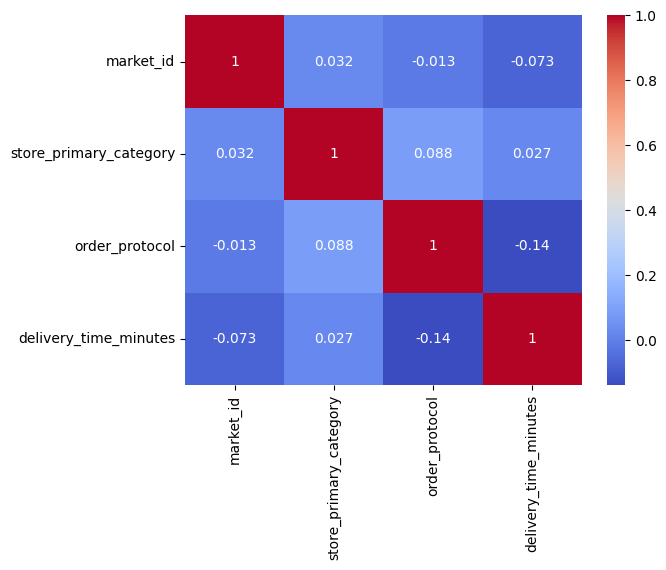

In [18]:
store_features = ['market_id', 'store_primary_category', 'order_protocol', 'delivery_time_minutes']
sns.heatmap(df[store_features].corr(), annot=True, cmap='coolwarm')
plt.show()


Very weak correlation from anything, but still order_protocol has tiny effect.

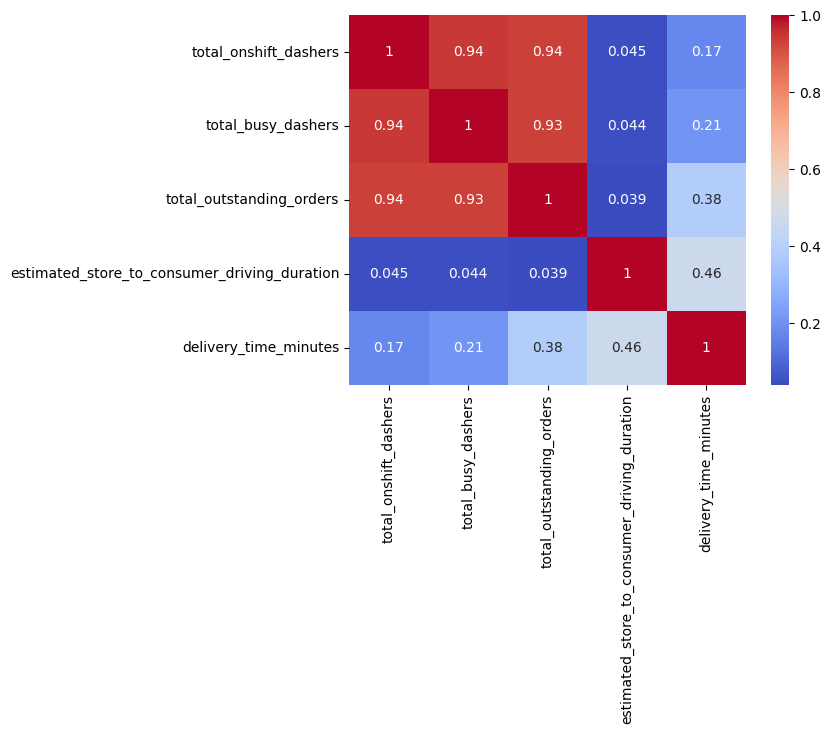

In [19]:
order_features = ['total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'estimated_store_to_consumer_driving_duration', 'delivery_time_minutes']
sns.heatmap(df[order_features].corr(), annot=True, cmap='coolwarm')
plt.show()

correlation between delivery_time and estimated driving duration shows that driving to the customer,is significant feature.

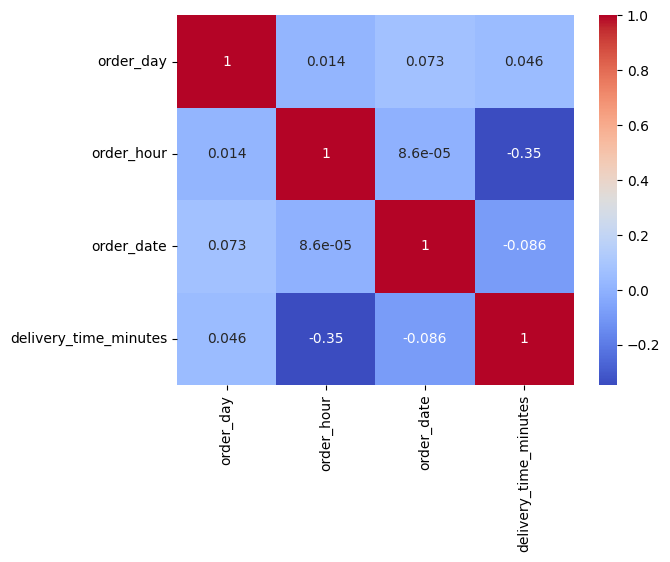

In [20]:
day_features = ['order_day', 'order_hour', 'order_date', 'delivery_time_minutes']
sns.heatmap(df[day_features].corr(), annot=True, cmap='coolwarm')
plt.show()

<Axes: >

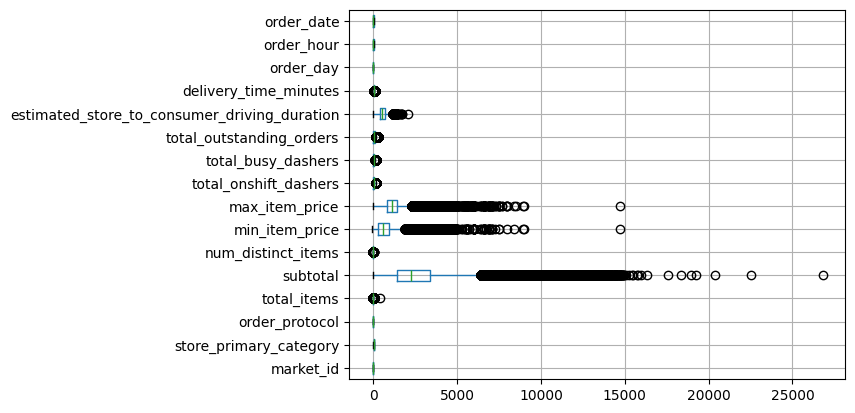

In [21]:
df.boxplot(vert=False)

Below manual method of data cleaning is not very effective and does not produce great results.
Let's clean the data using scikit-learn.

In [22]:
# sns.boxplot(x=df['total_items'])
# sns.boxplot(x=df['estimated_store_to_consumer_driving_duration'])

# We can see there is one value in columns total_items, estimated_store_to_consumer_driving_duration, subtotal, min_item_price, maxt_item_price which is very far from rest, let's drop that row.

# # let's create a copy before droping the rows.
# df_clean = df.copy()
# df_clean.drop(columns=['created_at', 'actual_delivery_time'], inplace=True)
# col_clean = ['total_items', 'estimated_store_to_consumer_driving_duration', 'subtotal', 'min_item_price', 'max_item_price']

# for col in col_clean:
#     i = df_clean[col].idxmax()
#     df_clean.drop(i, inplace=True)

# df_clean.reset_index(drop=True)

# df_clean.boxplot(vert=False)

# from sklearn.preprocessing import RobustScaler

# scaler = RobustScaler()
# df_clean_rscaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)
# df_clean_rscaled.boxplot(vert=False)

# Let's put a cap on the columns having extreme outliers

# col_cap = ['total_items', 'subtotal', 'min_item_price', 'max_item_price', 'num_distinct_items', 'delivery_time_minutes', 'estimated_store_to_consumer_driving_duration']

# for col in col_cap:
#     cap = df_clean[col].quantile(0.99)
#     df_clean[col] = df_clean[col].clip(upper=cap)


# from sklearn.preprocessing import RobustScaler

# scaler = RobustScaler()
# df_clean_rscaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)
# df_clean_rscaled.boxplot(vert=False)

# Now the data looks much cleaner.

# We handled outliers by two steps:

# droping the rows having potential absurd values.
# putting cap on extreme values.



In [23]:
df.drop(columns=['created_at', 'actual_delivery_time'], inplace=True)

In [24]:
from sklearn.neighbors import LocalOutlierFactor

model1 = LocalOutlierFactor()
df['lof_anomaly_score'] = model1.fit_predict(df)
df.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,delivery_time_minutes,order_day,order_hour,order_date,lof_anomaly_score
0,1.0,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,47.0,4,22,6,1
1,2.0,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,44.0,1,21,10,1
2,2.0,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,55.0,0,0,16,1
3,1.0,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,59.0,3,3,12,1
4,1.0,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,46.0,1,2,27,1


In [25]:
print('No. of outlier rows:', len(df.loc[(df['lof_anomaly_score']==-1)]), '\nAnd total No. of rows:', df.shape[0])

No. of outlier rows: 793 
And total No. of rows: 175777


Let's drop the outlier rows.

In [26]:
df = df.loc[(df['lof_anomaly_score'] == 1)]
df.shape

(174984, 17)

<Axes: >

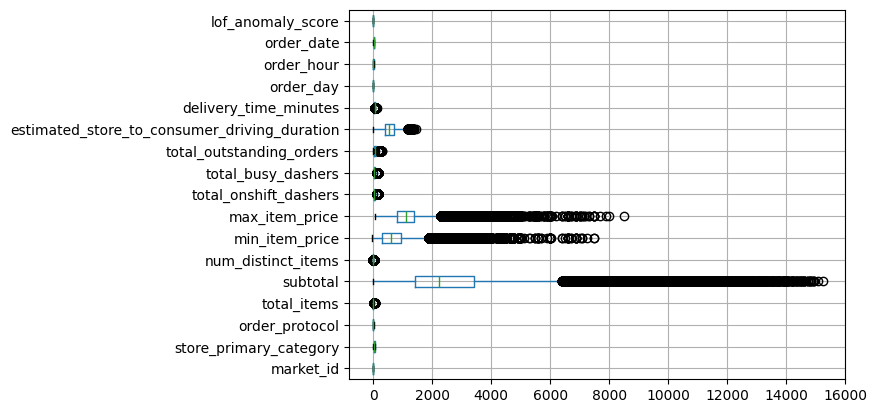

In [27]:
df.boxplot(vert=False)

In [28]:
df['market_id'].value_counts()

,count
market_id,
2.0,53251
4.0,46028
1.0,36927
3.0,20957
5.0,17187
6.0,634


In [29]:
df['store_primary_category'].nunique()

73

In [30]:
df['store_primary_category'].value_counts()

,count
store_primary_category,
4,18081
55,15660
46,15515
13,9893
58,8966
...,...
1,10
43,9
8,2


In [31]:
freq_map = df['store_primary_category'].value_counts()
df['store_primary_category'] = df['store_primary_category'].map(freq_map)

In [32]:
df['order_protocol'].value_counts()

,count
order_protocol,
1.0,48141
3.0,46911
5.0,41276
2.0,20795
4.0,17167
6.0,676
7.0,18


In [33]:
df = pd.get_dummies(df, columns=['market_id', 'order_protocol'], prefix=['market', 'protocol'], dtype=int)
df.head()

,store_primary_category,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,...,market_4.0,market_5.0,market_6.0,protocol_1.0,protocol_2.0,protocol_3.0,protocol_4.0,protocol_5.0,protocol_6.0,protocol_7.0
0,18081,4,3441,4,557,1239,33.0,14.0,21.0,861.0,...,0,0,0,1,0,0,0,0,0,0
1,15515,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,...,0,0,0,0,1,0,0,0,0,0
2,6367,4,4771,3,820,1604,8.0,6.0,18.0,289.0,...,0,0,0,0,0,1,0,0,0,0
3,6688,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,...,0,0,0,1,0,0,0,0,0,0
4,6688,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,...,0,0,0,1,0,0,0,0,0,0


# Data preprocessing

In [34]:
y = df['delivery_time_minutes']
y.shape

(174984,)

In [35]:
X = df.drop(columns=['delivery_time_minutes'])
X.shape

(174984, 27)

In [36]:
from sklearn.model_selection import train_test_split

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size = 0.2, random_state=42)

print('Train: ', X_train.shape, y_train.shape)
print('Test: ', X_test.shape, y_test.shape)
print('Validation: ', X_val.shape, y_val.shape)

Train:  (111989, 27) (111989,)
Test:  (34997, 27) (34997,)
Validation:  (27998, 27) (27998,)


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Creating and training of model

In [38]:
import tensorflow as tf
from tf.keras.models import Sequential
from tf.keras.layers import Dense

In [39]:
model = Sequential([Dense(64, activation='relu', input_shape=(X_train.shape[1],), name='hidden_layer_1', kernel_initializer='glorot_uniform'),
                    Dense(128, activation='relu', name='hidden_layer_2', kernel_initializer='glorot_uniform'),
                    Dense(256, activation='relu', name='hidden_layer_3', kernel_initializer='glorot_uniform'),
                    Dense(512, activation='relu', name='hidden_layer_4', kernel_initializer='glorot_uniform'),
                    Dense(1024, activation='relu', name='hidden_layer_5', kernel_initializer='glorot_uniform'),
                    Dense(512, activation='relu', name='hidden_layer_6', kernel_initializer='glorot_uniform'),
                    Dense(256, activation='relu', name='hidden_layer_7', kernel_initializer='glorot_uniform'),
                    Dense(64, activation='relu', name='hidden_layer_8', kernel_initializer='glorot_uniform'),
                    Dense(32, activation='relu', name='hidden_layer_9', kernel_initializer='glorot_uniform'),
                    Dense(1, activation=None, name='output_layer')])

In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 64)             │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_6 (Dense)          │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_7 (Dense)          │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_8 (Dense)          │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_9 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,374,721 (5.24 MB)

 Trainable params: 1,374,721 (5.24 MB)

 Non-trainable params: 0 (0.00 B)

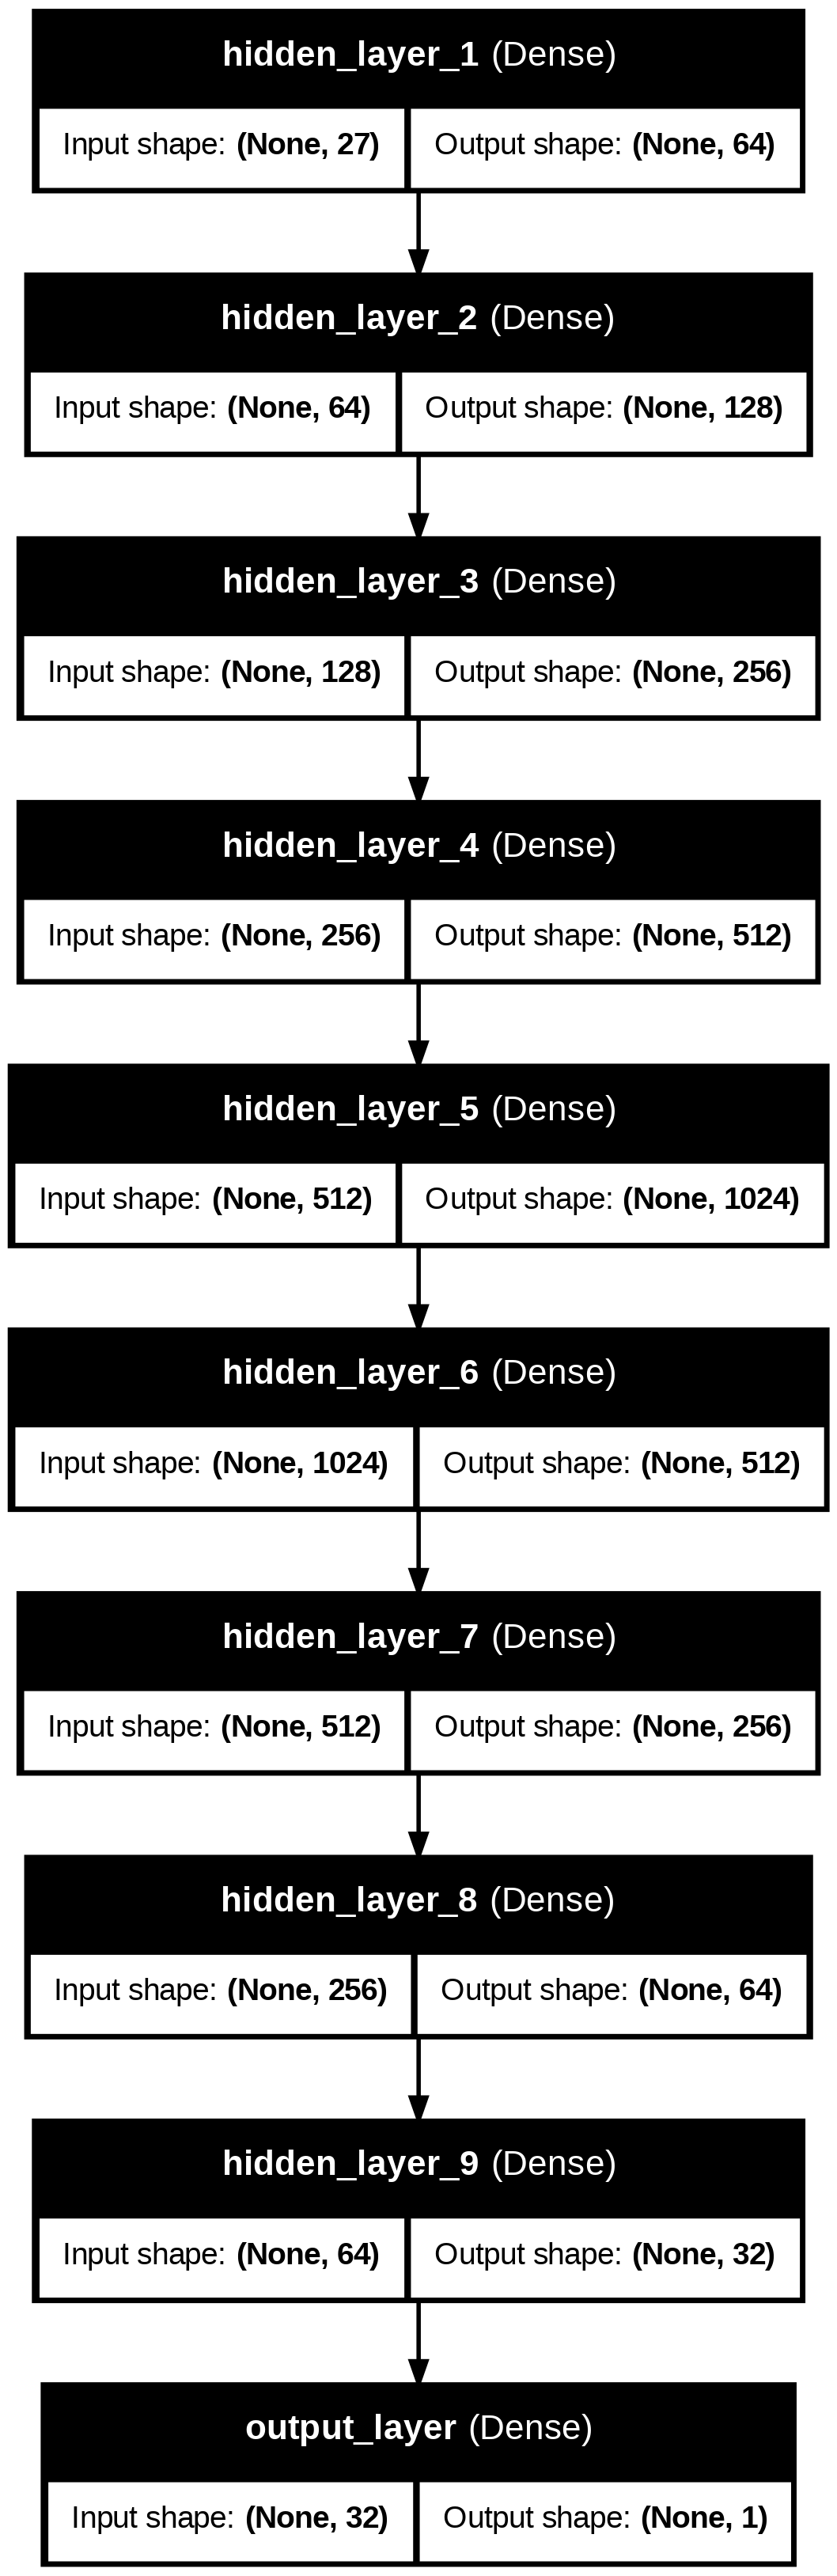

In [41]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='Porter_NN_model.png', show_shapes=True, show_layer_names=True)

In [42]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae'])

In [47]:
history = model.fit(X_train, y_train, epochs=50, batch_size=256, validation_data=(X_val, y_val), verbose=1)

Epoch 1/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1951 - mae: 0.3482 - val_loss: 0.1864 - val_mae: 0.3422
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2301 - mae: 0.3726 - val_loss: 0.1733 - val_mae: 0.3270
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2112 - mae: 0.3584 - val_loss: 0.1824 - val_mae: 0.3307
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1853 - mae: 0.3346 - val_loss: 0.3112 - val_mae: 0.4526
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2123 - mae: 0.3600 - val_loss: 0.1651 - val_mae: 0.3172
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1975 - mae: 0.3447 - val_loss: 0.1754 - val_mae: 0.3213
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1808 - mae: 0.3339 - val_loss: 0.4531 - val_mae: 0.5418
Epoch 8/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2330 - mae: 0.3755 - val_loss: 0.1717 - val_mae: 0.3229
Epoch 9/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - lo

KeyboardInterrupt: 

In [46]:
epoch = history['epoch']
loss = history['loss']
val_loss = history['val_loss']

plt.plot(x=epoch, y=loss, label='train')
plt.plot(x=epoch, y=val_loss, label='validation')
plt.legend()

plt.show()

NameError: name 'history' is not defined

# Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [45]:
mae = np.mean(np.abs(rf_pred - y_test))
print(mae)

1.4017124324942136
